# Data Pre-Processing and Exploratory Data Analysis

### Import the Data

Import all libraries needed for the project, and import the data into a dataframe. 

In [17]:
# Importing needed libraries 
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

# For scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Deal with imbalanced dataset 
import imblearn


# Import the dataset
dataset = pd.read_csv('data/train.csv', index_col='id')
# Create dataframe
df = pd.DataFrame(dataset)
# Check dataset
df.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


### Data Overview

Get an overview of the number and types of values in the dataset and create a features summary.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17

In [19]:
summary = pd.DataFrame(df.dtypes, columns=['data types'])
# Calculate the number of missing values
summary['# missing values'] = (df == -1).sum().values 
# Number of unique values by features
summary['# unique values'] = df.nunique().values # -> eg. target as 2 unique values as it is 

# Get the type of data in each column
variable_types = []
for col in df.columns: 
    if 'bin' in col or col == 'target':
        variable_types.append('binary')
    elif 'cat' in col: 
        variable_types.append('nominal') # means categorical without any ranking
    elif df[col].dtype == float: 
        variable_types.append('continuous')
    elif df[col].dtype == np.int64:
        variable_types.append('categorical')
summary['variable type'] = variable_types

# View the top of this dataframe
summary.head()

,data types,# missing values,# unique values,variable type
target,int64,0,2,binary
ps_ind_01,int64,0,8,categorical
ps_ind_02_cat,int64,216,5,nominal
ps_ind_03,int64,0,12,categorical
ps_ind_04_cat,int64,83,3,nominal


In [20]:
# Get the names of the columns of a certain variable type 
summary[summary['variable type'] == 'nominal'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

### Value Distributions Visualisation

#### Target Value

Check how balanced (or not) the target value is among the training data.

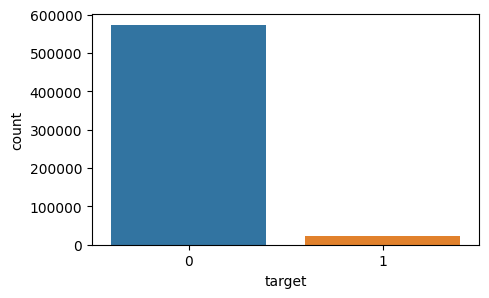

In [21]:
plt.figure(figsize=(5, 3)) # Create a figure

ax = sns.countplot(df, x='target') # countplot: Show the counts of observations in each categorical bin using bars.

#### Feature Distribution

How is each feature distributed looking at the target values? 

In [22]:
def plot_target_ratio_by_feat(datatype='binary', legend='on'): 
    cols = summary[summary['variable type'] == datatype].index
    ncols = 4
    nrows = len(cols) // ncols if len(cols) % ncols == 0 else len(cols) // ncols + 1
    # Create grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))
    axes = axes.flatten() # Flatten the axes array for easy iteration
    
    for i, feature in enumerate(df[cols]):
        sns.countplot(df, x='target', hue=feature, ax=axes[i])
        # turn off legend if set
        if legend == 'off':
            axes[i].legend().set_visible(False)
        # set the title for each subplot
        axes[i].set_title(f'Countplot for {col}')
    
    plt.tight_layout()

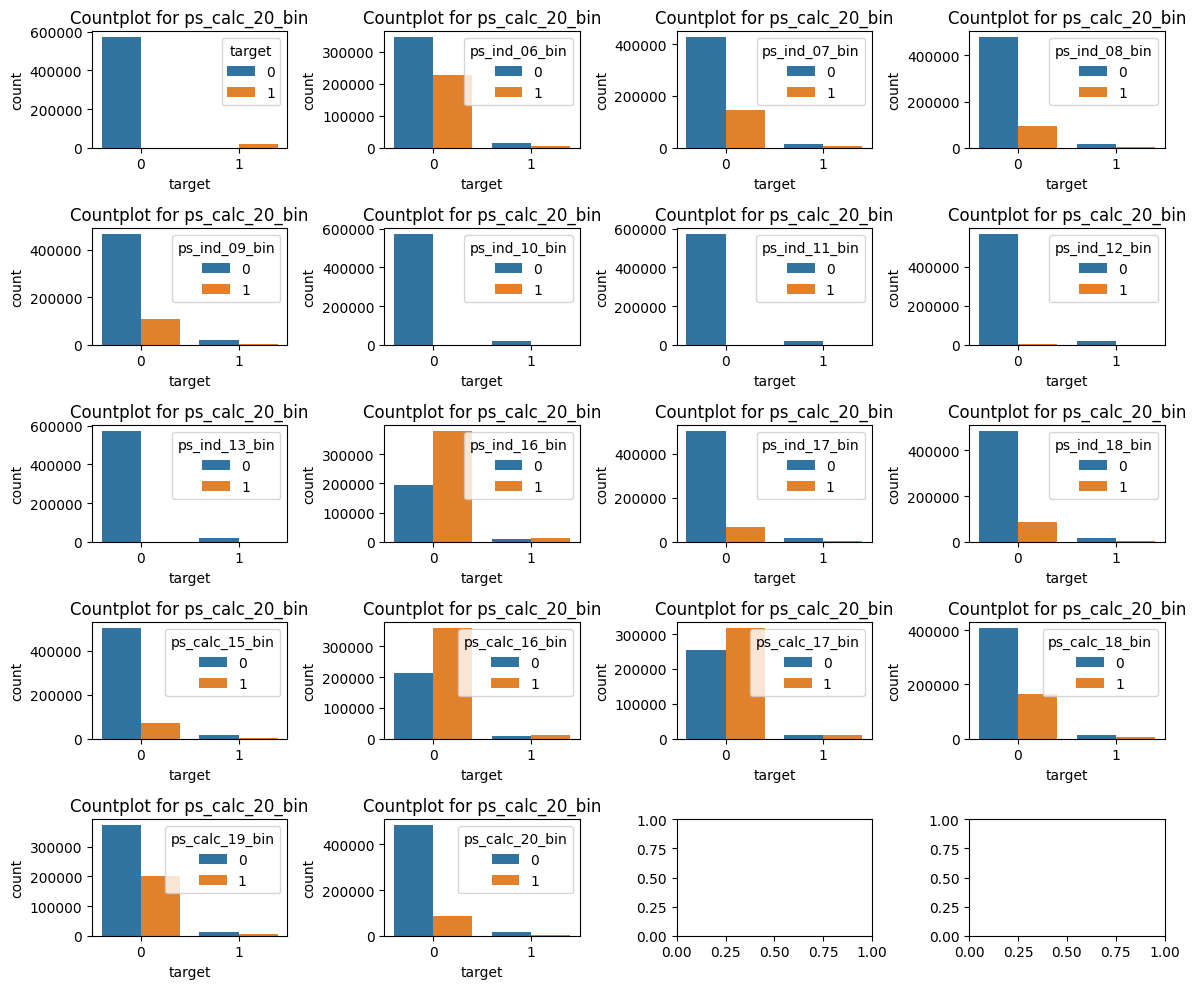

In [23]:
plot_target_ratio_by_feat(datatype='binary')

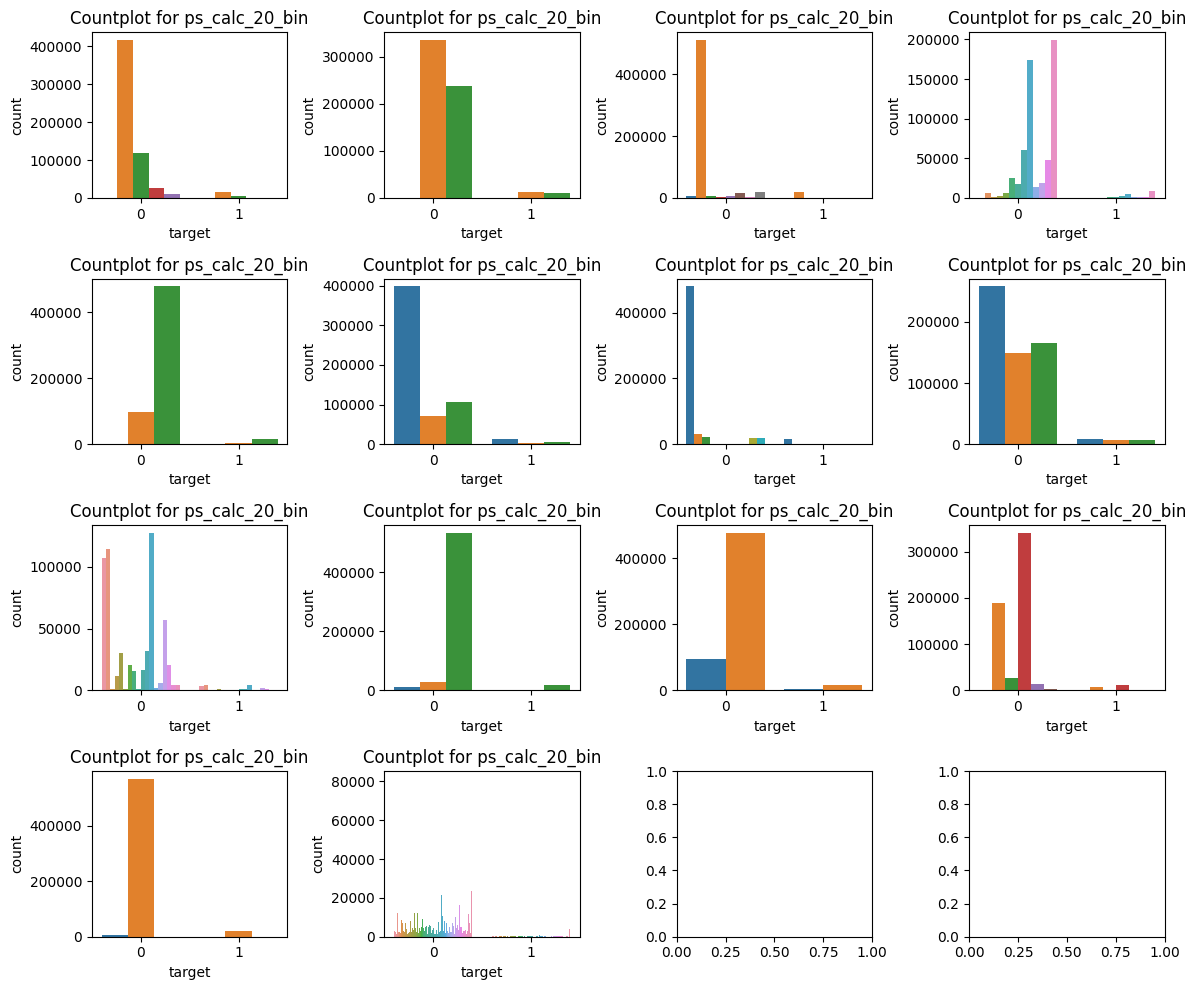

In [24]:
plot_target_ratio_by_feat(datatype='nominal', legend='off')

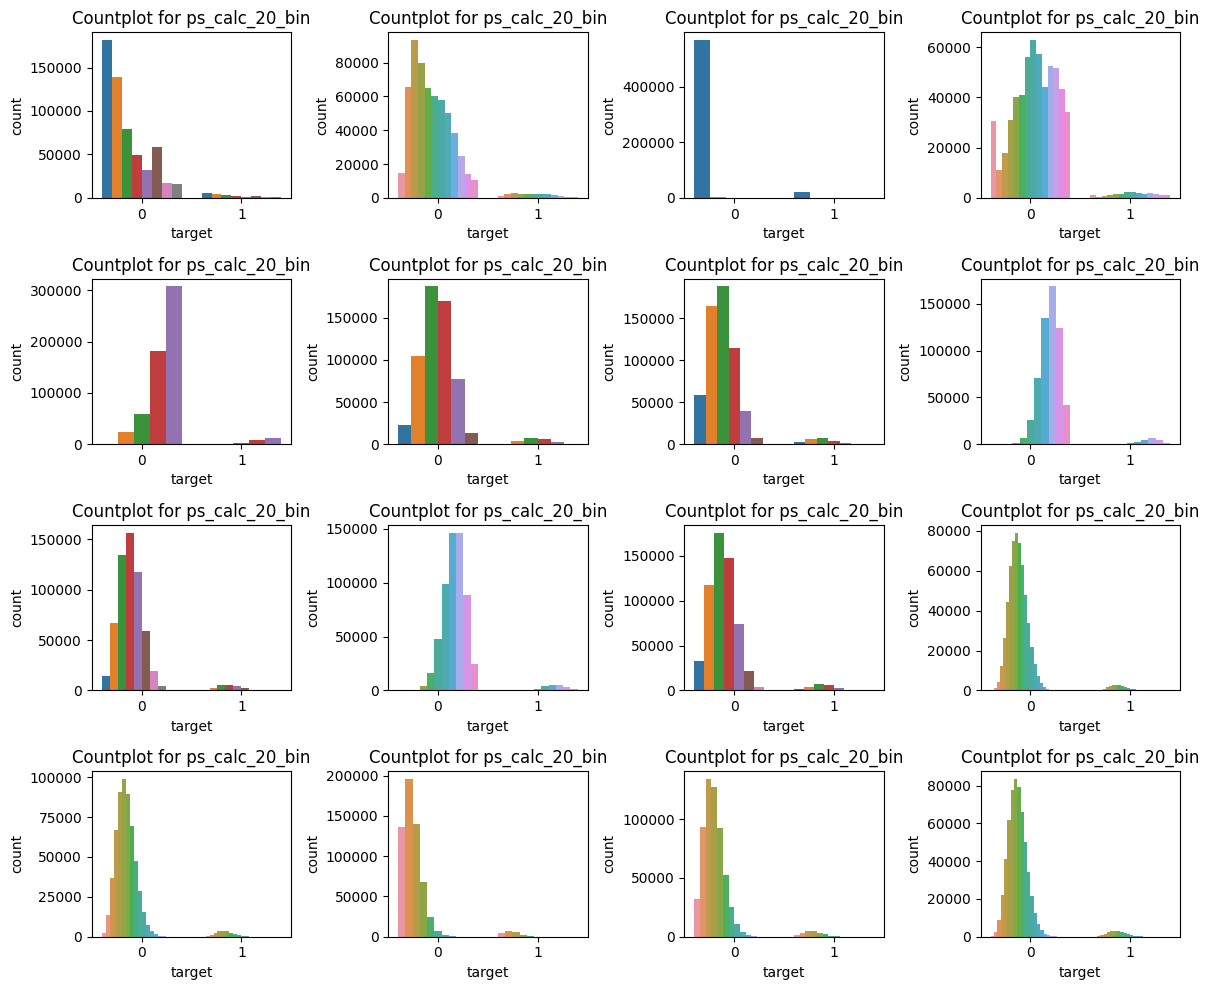

In [25]:
plot_target_ratio_by_feat(datatype='categorical', legend='off')

### Remove Missing Values 

Remove the missing values 

In [26]:
# 1. Remove missing values: All our missing data is marked with -1, so remove every row that has a -1 in it: 
df.replace(-1, np.NaN, inplace=True) # replace the -1 values with NaN, since they indicate missing data
df.dropna(inplace=True)

### Correlation Matrix

Check the correlation among continuous features. 

<AxesSubplot:>

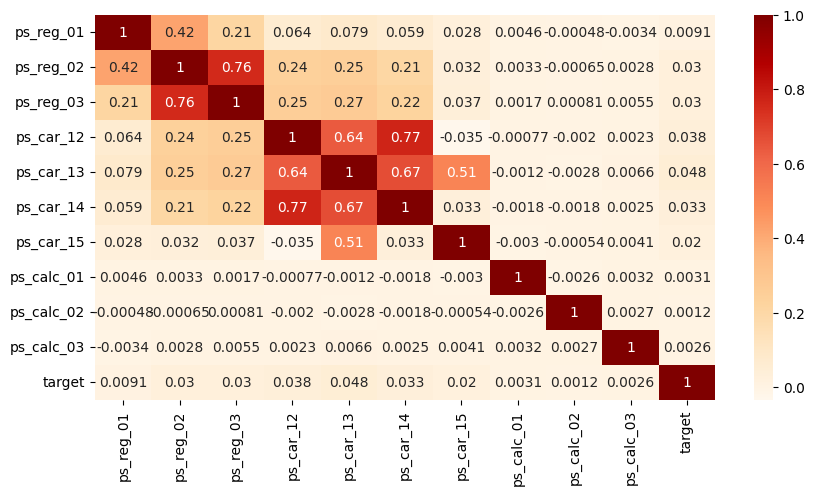

In [27]:
# Find correlating features: 
plt.figure(figsize=(10, 5))
c = df[summary[summary['variable type'] == 'continuous'].index.append(summary[summary.index == 'target'].index)].corr() # Compute pairwise correlation of columns
sns.heatmap(c, annot=True, cmap='OrRd')

### Split into Train and Testing Sets

In [28]:
# 2. Split into train and testing data 
X = df.iloc[:, 2:] # dropping the id and target columns
y = df["target"] # just the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Removing Outliers

Removes all outliers from `X_train` and `y_train`. 

In [29]:
# 3. Remove outliers: It depends on what you exactly need for your use-case, but if you remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)
# identify outliers in the training dataset
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X_train) # Label is 1 for an inlier and -1 for an outlier
# select all rows that are not outliers
inlier_indexes = y_pred == 1

# Remove from X_train and y_train
X_train, y_train = X_train[inlier_indexes], y_train[inlier_indexes]

### Scaling the Data

This method should work for both supervised and unsupervised learning. It either takes in only one argument (eg. X), or it takes X_train and X_test. 

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale_data(X_train, X_test=None, scaling_type='sta'):
    """
    This function scales the input data using either MinMax scaling or Standard scaling.

    Parameters:
    - X_train: The training data.
    - X_test: The testing data (optional).
    - scaling_type: The type of scaler to use, either 'mm' for MinMax Scaling or 'sta' for Standard Scaling.

    Returns:
    - Scaled X_train and X_test (if provided).

    Example:
    >>> X_train_scaled, X_test_scaled = scale_data(X_train, X_test, scaling_type='mm')
    """

    if scaling_type == 'mm':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        if X_test is not None:
            X_test_scaled = scaler.transform(X_test)
    elif scaling_type == 'sta':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        if X_test is not None:
            X_test_scaled = scaler.transform(X_test)
    else:
        return "No correct scaling method."

    if X_test is not None:
        print("Scaled data, size of X_train:", X_train_scaled.shape, "size of X_test:", X_test_scaled.shape)
        return X_train_scaled, X_test_scaled
    else:
        print("Scaled data, size of X:", X_train_scaled.shape)
        return X_train_scaled

In [31]:
# Supervised learning
X_train, X_test = scale_data(X_train, X_test)

Scaled data, size of X_train: (89949, 56) size of X_test: (24987, 56)


In [36]:
# Unsupervised learning 
X = scale_data(np.concatenate([X_train, X_test], axis=0))

Scaled data, size of X: (114936, 56)
